In [93]:
# Libraries imported
import pandas as pd # data manipulation

In [94]:
flipkart = pd.read_excel('flipkart_4.xlsx') # loading dataset

In [95]:
flipkart

Unnamed: 0                             product_name  \
0               0      Alisha Solid Women's Cycling Shorts   
1               1      FabHomeDecor Fabric Double Sofa Bed   
2               2                               AW Bellies   
3               3      Alisha Solid Women's Cycling Shorts   
4               4    Sicons All Purpose Arnica Dog Shampoo   
...           ...                                      ...   
19995       19995           WallDesign Small Vinyl Sticker   
19996       19996  Wallmantra Large Vinyl Stickers Sticker   
19997       19997  Elite Collection Medium Acrylic Sticker   
19998       19998  Elite Collection Medium Acrylic Sticker   
19999       19999  Elite Collection Medium Acrylic Sticker   

                                             description  \
0      Key Features of Alisha Solid Women's Cycling S...   
1      FabHomeDecor Fabric Double Sofa Bed (Finish Co...   
2      Key Features of AW Bellies Sandals Wedges Heel...   
3      Key Features of Alisha Solid Women's Cycling S...   
4      Specifications of Sicons All Purpose Arnica Do...   
...                                                  ...   
19995  Buy WallDesign Small Vinyl Sticker for Rs.730 ...   
19996  Buy Wallmantra Large Vinyl Stickers Sticker fo...   
19997  Buy Elite Collection Medium Acrylic Sticker fo...   
19998  Buy Elite Collection Medium Acrylic Sticker fo...   
19999  Buy Elite Collection Medium Acrylic Sticker fo...   

                                  product_specifications  \
0      {"product_specification"=>[{"key"=>"number of ...   
1      {"product_specification"=>[{"key"=>"installati...   
2      {"product_specification"=>[{"key"=>"ideal for"...   
3      {"product_specification"=>[{"key"=>"number of ...   
4      {"product_specification"=>[{"key"=>"pet type",...   
...                                                  ...   
19995  {"product_specification"=>[{"key"=>"number of ...   
19996  {"product_specification"=>[{"key"=>"number of ...   
19997  {"product_specification"=>[{"key"=>"number of ...   
19998  {"product_specification"=>[{"key"=>"number of ...   
19999  {"product_specification"=>[{"key"=>"number of ...   

             product_category  
0                    clothing  
1              homeessentials  
2             beautytoys&more  
3                    clothing  
4             beautytoys&more  
...                       ...  
19995  automotive&accessories  
19996  automotive&accessories  
19997  automotive&accessories  
19998  automotive&accessories  
19999  automotive&accessories  

[20000 rows x 5 columns]

In [96]:
del_col = ['Unnamed: 0']
flipkart = flipkart.drop(columns=del_col)

#### No point in keeping these column as details about the product that are given in these column can be infer from description column No new details is given in these column

In [97]:

del_col = ['product_name', 'product_specifications']
flipkart = flipkart.drop(columns=del_col)

Removing Punctuation and stopwords from description column

In [98]:
import string
import nltk
from nltk import sent_tokenize # Splitting the sentence
from nltk.tokenize import word_tokenize #for splitting into words
from nltk.corpus import stopwords
import re

In [99]:
# Run one time only
# nltk.download()

In [100]:
# Contains stop words of english
stop = stopwords.words('english')

In [101]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each


## Function to:

1. Remove punctuation from each token.
2. Filter out remaining tokens that are not alphabetic.
3. Filter out tokens that are stop words.

\w+ matches one or more word characters (same as [a-zA-Z0-9_]+).

## Lemmatization

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . 

In [102]:
flipkart['description'] = flipkart['description'].str.lower()

In [103]:
flipkart['description']

0        key features of alisha solid women's cycling s...
1        fabhomedecor fabric double sofa bed (finish co...
2        key features of aw bellies sandals wedges heel...
3        key features of alisha solid women's cycling s...
4        specifications of sicons all purpose arnica do...
                               ...                        
19995    buy walldesign small vinyl sticker for rs.730 ...
19996    buy wallmantra large vinyl stickers sticker fo...
19997    buy elite collection medium acrylic sticker fo...
19998    buy elite collection medium acrylic sticker fo...
19999    buy elite collection medium acrylic sticker fo...
Name: description, Length: 20000, dtype: object

In [104]:
wn = nltk.WordNetLemmatizer()

In [105]:
def desc_clean(desc):
    tokens_pr = "".join([char for char in desc if char not in string.punctuation])
    tokens = re.split('\W+', tokens_pr)
    words = " ".join([wn.lemmatize(w) for w in tokens if not w in stop])
    return words  


In [106]:
flipkart['desc_clean'] = flipkart['description'].apply(lambda x: desc_clean(str(x)))

Getting:

TypeError: 'float' object is not iterable

So I had to pass x as string in the function parameter

In [107]:
flipkart['description'].dtypes

dtype('O')

In [108]:
flipkart['desc_clean']

0        key feature alisha solid woman cycling short c...
1        fabhomedecor fabric double sofa bed finish col...
2        key feature aw belly sandal wedge heel casuals...
3        key feature alisha solid woman cycling short c...
4        specification sicons purpose arnica dog shampo...
                               ...                        
19995    buy walldesign small vinyl sticker rs730 onlin...
19996    buy wallmantra large vinyl sticker sticker rs1...
19997    buy elite collection medium acrylic sticker rs...
19998    buy elite collection medium acrylic sticker rs...
19999    buy elite collection medium acrylic sticker rs...
Name: desc_clean, Length: 20000, dtype: object

In [109]:
# For plotting Word Cloud
description = flipkart['desc_clean'].tolist()
description_join = " ".join(description)

In [110]:
flipkart['length'] = flipkart['desc_clean'].apply(lambda x: len(x))

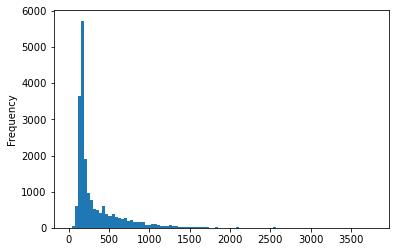

In [111]:
flipkart['length'].plot(bins=100, kind='hist')

Most the descriptions are of length 250. This will help in padding them for training with LSTM/GRU.

In [112]:
#!pip install WordCloud

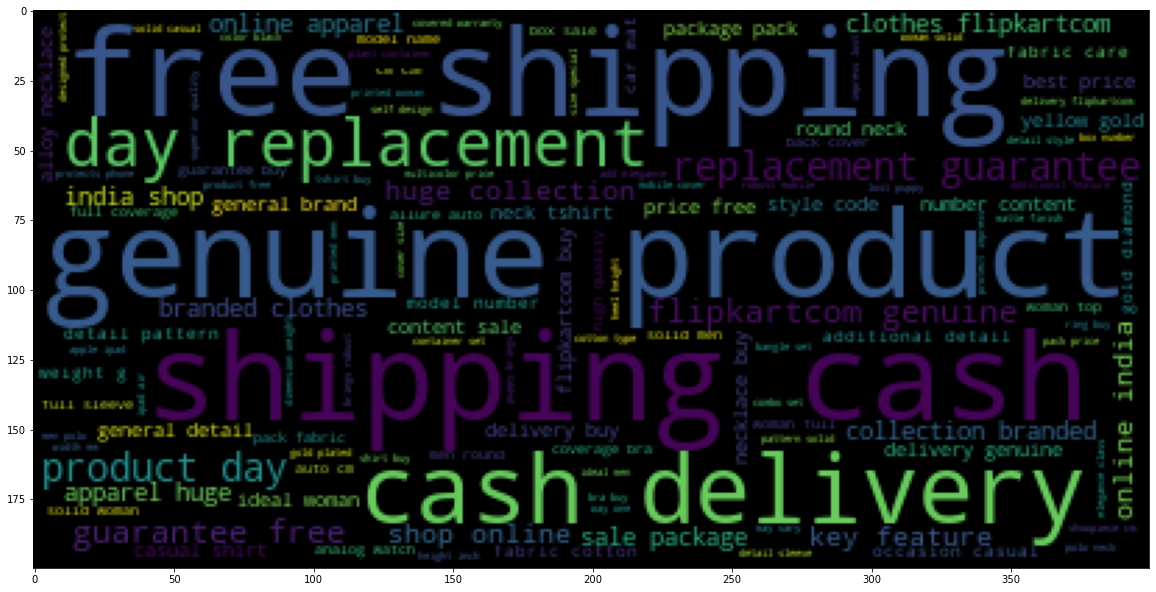

In [113]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(description_join))

This will help you visualize that most of the words that are frequent are pretty useless.

1. flipkartcom
2. key feature
3. online
4. india
5. product
6. delivery
7. free shipping
8. replacement guarantee
9. genuine
10. shop

Removing these words from the description and then again plot the word cloud.


In [114]:
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('flipkartcom',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('key feature',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('online',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('india',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('product',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('delivery',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('replacement',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('free',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('shipping',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('cash',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('guarantee',''))
flipkart['desc_clean'] = flipkart['desc_clean'].apply(lambda x: x.replace('shop',''))

I am not doing the frequency thing right now and only removing with the help of word cloud as We have class imbalance and looking at the plot in 'data_cleaning.ipynb' notebook clothing has more labels so that might loose most of it's important word (I am sure so I will experiment with this later in this notebook)

In [115]:
description_2 = flipkart['desc_clean'].tolist()
description_2_join = " ".join(description_2)

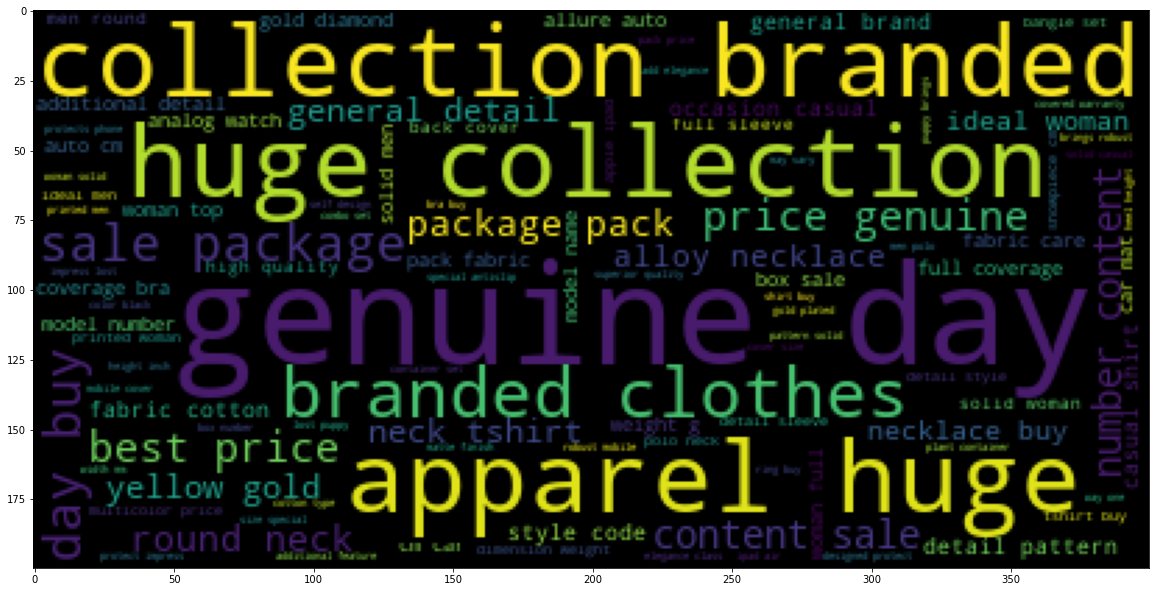

In [116]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(description_2_join))

Word cloud is the only visualization technique I can think of at this moment.

We plot cloud label wise also

In [117]:
description_cloth = flipkart[flipkart['product_category']=='clothing']['desc_clean'].tolist()
description_cloth_join = " ".join(description_cloth)

In [118]:
description_cloth_join

' alisha solid woman cycling short cotton lycra navy red navyspecifications alisha solid woman cycling short short detail number content sale package pack 3 fabric cotton lycra type cycling short general detail pattern solid ideal woman fabric care gentle machine wash lukewarm water bleach additional detail style code altht3p21 box 3 short  alisha solid woman cycling short cotton lycra black redspecifications alisha solid woman cycling short short detail number content sale package pack 2 fabric cotton lycra type cycling short general detail pattern solid ideal woman fabric care gentle machine wash lukewarm water bleach additional detail style code altght11 box 2 short  alisha solid woman cycling short cotton lycra navy red white redspecifications alisha solid woman cycling short short detail number content sale package pack 4 fabric cotton lycra type cycling short general detail pattern solid ideal woman box 4 short additional detail style code altght4p26 fabric care gentle machine wa

Plotting the description word cloud for clothing category

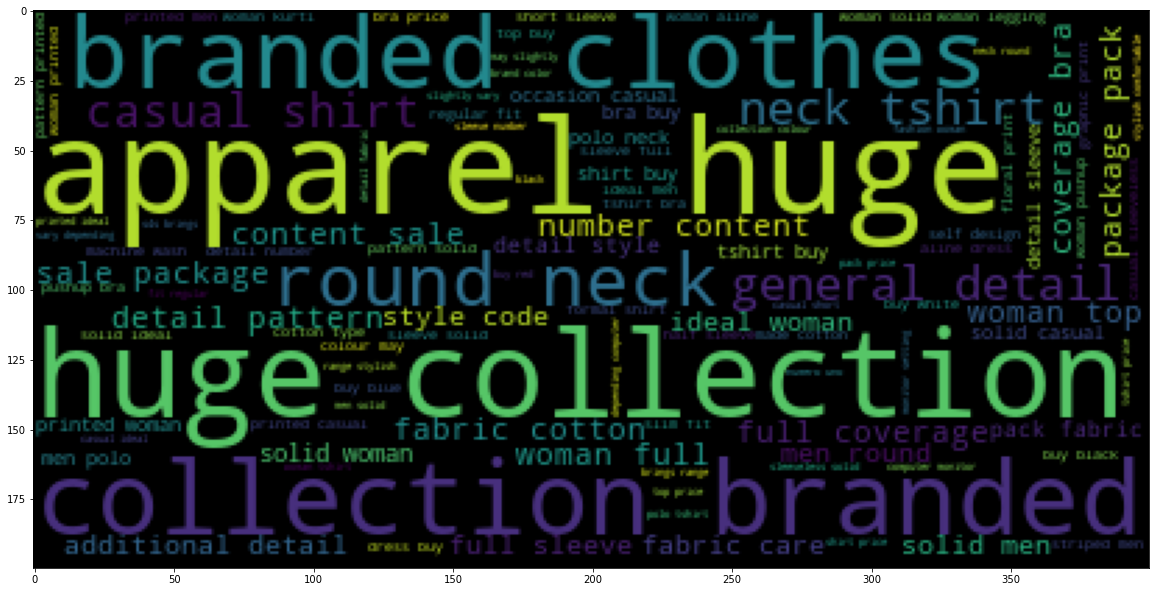

In [119]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(description_cloth_join))

## Test Train Split

In [120]:
flipkart.columns

Index(['description', 'product_category', 'desc_clean', 'length'], dtype='object')

In [121]:
from sklearn.model_selection import train_test_split

X = flipkart['desc_clean']
y = flipkart['product_category']

In [122]:
X

0         alisha solid woman cycling short cotton lycra...
1        fabhomedecor fabric double sofa bed finish col...
2         aw belly sandal wedge heel casualsaw belly pr...
3         alisha solid woman cycling short cotton lycra...
4        specification sicons purpose arnica dog shampo...
                               ...                        
19995    buy walldesign small vinyl sticker rs730  wall...
19996    buy wallmantra large vinyl sticker sticker rs1...
19997    buy elite collection medium acrylic sticker rs...
19998    buy elite collection medium acrylic sticker rs...
19999    buy elite collection medium acrylic sticker rs...
Name: desc_clean, Length: 20000, dtype: object

In [123]:
y.head()

0           clothing
1     homeessentials
2    beautytoys&more
3           clothing
4    beautytoys&more
Name: product_category, dtype: object

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [125]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16000,), (16000,), (4000,), (4000,))

In [126]:
X_train

115      crocs boot buy crocs boot 16010 r 3995  genuin...
7711      jazzup solid boy yellow red track pant yellow...
9017     nexus nx7557 analog watch woman price r 999 ch...
5691     divine forever alloy necklace price r 299 divi...
17828    specification antshrike men pyjama pack 3 gene...
                               ...                        
5836      buy tootpado signature ben10 print art canvas...
7258        buy tenda tea302 r 1800  genuine  30 day      
2415     s4s comfortable woman full coverage bra buy ma...
19734    lelegantae woman aline dress buy burgundy lele...
19154     allora 3d screen expander speaker micromax bo...
Name: desc_clean, Length: 16000, dtype: object

### Feature Extraction: 
1. Count Vectorization
2. Tf-idf

### Algorithm:
1. Logistic Regression
2. Random Forest Classifier
3. Kneighbour Classifier

### Tokenization
In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called tokenization. 

### Feature Extraction
These words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature extraction (or vectorization).

### Count vectorization
CountVectorizer tokenizes(tokenization means dividing the sentences in words) the text along with performing very basic preprocessing. It removes the punctuation marks and converts all the words to lowercase. The vocabulary of known words is formed which is also used for encoding unseen text later.

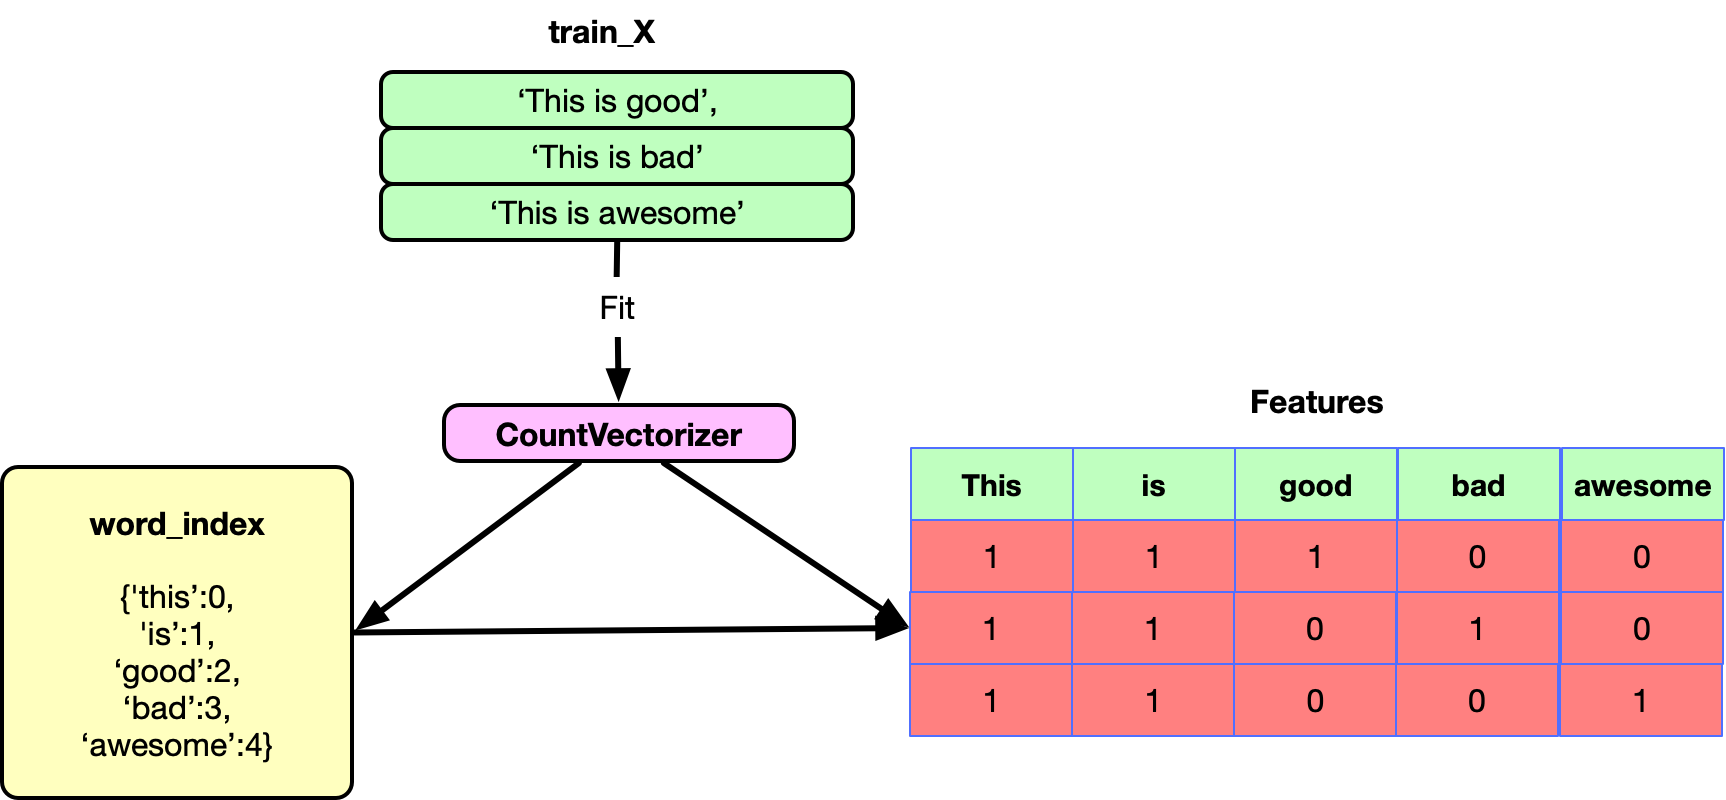

In [38]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer()
X_train_featcv = cv.fit_transform(X_train).toarray()
print(cv.vocabulary_)

{'kiosha': 14821, 'woman': 26813, 'solid': 23246, 'casual': 7328, 'shirt': 22551, 'buy': 7033, 'pink': 18987, '1299': 605, 'apparel': 5186, 'huge': 13553, 'collection': 8090, 'branded': 6715, 'clothes': 7913, 'nimya': 17617, 'men': 16478, 'polo': 19310, 'neck': 17448, 'tshirt': 25319, 'price': 19608, '349': 2589, 'lifestyle': 15499, 'fashion': 11328, 'athletic': 5456, 'made': 15992, 'bring': 6801, 'style': 23951, 'highly': 13313, 'comfortable': 8230, 'stylish': 23982, 'worn': 26881, 'occasion': 17884, 'day': 9186, 'work': 26858, 'weekend': 26519, 'full': 12090, 'fun': 12106, 'striking': 23887, 'right': 20851, 'balance': 5789, 'new': 17542, 'age': 4667, 'tried': 25237, 'tested': 24662, 'collar': 8076, 'button': 7017, 'placket': 19083, 'short': 22614, 'sleeve': 22972, 'ribbed': 20822, 'hem': 13217, 'band': 5811, 'fashionzaadi': 11353, 'triangle': 25225, 'bright': 6783, 'alloy': 4845, 'necklace': 17457, '199': 1388, 'genuine': 12373, '30': 2334, 'egizmos': 10444, 'micro': 16611, 'charging

In [39]:
X_test_featcv = cv.transform(X_test).toarray()

In [46]:
# Label encoding test data
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

test_labels = label_encoder.fit_transform(y_test)
train_labels = label_encoder.fit_transform(y_train)
  
train_labels

array([3, 3, 0, ..., 3, 2, 3])

In [43]:
X_train_featcv.shape, X_test_featcv.shape

((16000, 27313), (4000, 27313))

In [48]:
import numpy as np
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [49]:
train_labels

array([3, 3, 0, ..., 3, 2, 3])

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Evaluation of the model
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

### Logistic Regression

In [51]:
logmodel_cv = LogisticRegression()
logmodel_cv.fit(X_train_featcv, y_train)
predictions_lr = logmodel_cv.predict(X_test_featcv)
predictions_lr

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array(['clothing', 'gadgets&accessories', 'gadgets&accessories', ...,
       'accessories&essentials', 'homeessentials', 'clothing'],
      dtype=object)

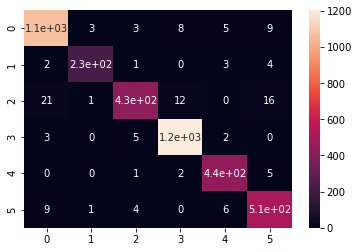

In [52]:
cm = confusion_matrix(y_test, predictions_lr)
sns.heatmap(cm, annot=True)

In [53]:
accuracy_score(y_test, predictions_lr)

0.9685

In [54]:
print(classification_report(y_test,predictions_lr))

                        precision    recall  f1-score   support

accessories&essentials       0.97      0.97      0.97      1093
automotive&accessories       0.98      0.96      0.97       239
       beautytoys&more       0.97      0.90      0.93       481
              clothing       0.98      0.99      0.99      1212
   gadgets&accessories       0.96      0.98      0.97       447
        homeessentials       0.94      0.96      0.95       528

              accuracy                           0.97      4000
             macro avg       0.97      0.96      0.96      4000
          weighted avg       0.97      0.97      0.97      4000



In [61]:
print(y_test.head(), predictions_lr[:5], X_test.head())

2426                   clothing
13676       gadgets&accessories
17174       gadgets&accessories
17854           beautytoys&more
6053     accessories&essentials
Name: product_category, dtype: object ['clothing' 'gadgets&accessories' 'gadgets&accessories' 'beautytoys&more'
 'accessories&essentials'] 2426     luxemburg beige color woman tube bra buy beige...
13676    buy enthopia back cover ipad mini ipad mini 2 ...
17174    thelostpuppy back cover apple ipad air multico...
17854    specification anshul fashion lace general occa...
6053       buy ego combo set  r 555  genuine  30 day      
Name: desc_clean, dtype: object


### Random Forest Classifier

In [55]:
classifier_rfc = RandomForestClassifier(n_estimators = 100, random_state=0)
classifier_rfc

RandomForestClassifier(random_state=0)

In [139]:
classifier_rfc.fit(X_train_featcv, y_train)

RandomForestClassifier(random_state=0)

In [140]:
predictions_rfc = classifier_rfc.predict(X_test_featcv)
predictions_rfc

array(['gadgets&accessories', 'gadgets&accessories',
       'accessories&essentials', ..., 'clothing',
       'accessories&essentials', 'clothing'], dtype=object)

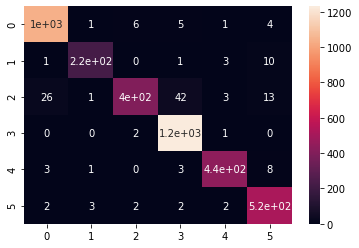

In [141]:
cm = confusion_matrix(y_test, predictions_rfc)
sns.heatmap(cm, annot=True)

In [142]:
print(classification_report(y_test,predictions_rfc))

                        precision    recall  f1-score   support

accessories&essentials       0.97      0.98      0.98      1057
automotive&accessories       0.97      0.94      0.95       237
       beautytoys&more       0.98      0.82      0.89       485
              clothing       0.96      1.00      0.98      1234
   gadgets&accessories       0.98      0.97      0.97       457
        homeessentials       0.94      0.98      0.96       530

              accuracy                           0.96      4000
             macro avg       0.97      0.95      0.96      4000
          weighted avg       0.96      0.96      0.96      4000



In [144]:
accuracy_score(y_test, predictions_rfc)

0.9635

### K Neighbors Classifer

In [33]:
neigh_cv = KNeighborsClassifier(n_neighbors=3)
neigh_cv

KNeighborsClassifier(n_neighbors=3)

In [34]:
neigh_cv.fit(X_train_featcv, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
predictions_KNN_cv = neigh_cv.predict(X_test_featcv)
predictions_KNN_cv

array(['homeessentials', 'clothing', 'clothing', ..., 'clothing',
       'automotive&accessories', 'beautytoys&more'], dtype=object)

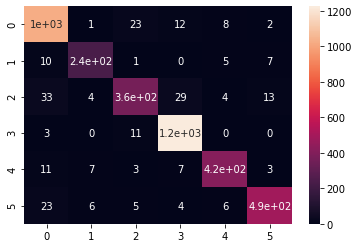

In [36]:
cm = confusion_matrix(y_test, predictions_KNN_cv)
sns.heatmap(cm, annot=True)

In [37]:
print(classification_report(y_test,predictions_KNN_cv))

                        precision    recall  f1-score   support

accessories&essentials       0.93      0.96      0.94      1071
automotive&accessories       0.93      0.91      0.92       260
       beautytoys&more       0.89      0.81      0.85       448
              clothing       0.96      0.99      0.97      1240
   gadgets&accessories       0.95      0.93      0.94       447
        homeessentials       0.95      0.92      0.93       534

              accuracy                           0.94      4000
             macro avg       0.93      0.92      0.93      4000
          weighted avg       0.94      0.94      0.94      4000



In [38]:
accuracy_score(y_test, predictions_KNN_cv)

0.93975

#### For Count vectorizer we get maximum accuracy with logistic regression.
I save LR predicted values as a column

I have tried taking n_neighbors=7 for KNeighbor Classifier but I see their wasn't much difference and accuracy was less than 96% , so I didn't try that here

In [127]:
X_test.index

Int64Index([  870, 19628, 12169,  6123,   967, 12606, 18853, 14775, 17905,
                5,
            ...
            11453, 12740, 13016, 18180,  4386, 12531,  2179, 14613,  8897,
            16014],
           dtype='int64', length=4000)

In [128]:
flipkart['predict_lr_cv'] = 'Training row'

In [129]:
j=0
for i in X_test.index:
    flipkart['predict_lr_cv'][i] = predictions_lr[j]
    j=j+1

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [130]:
flipkart

description  \
0      key features of alisha solid women's cycling s...   
1      fabhomedecor fabric double sofa bed (finish co...   
2      key features of aw bellies sandals wedges heel...   
3      key features of alisha solid women's cycling s...   
4      specifications of sicons all purpose arnica do...   
...                                                  ...   
19995  buy walldesign small vinyl sticker for rs.730 ...   
19996  buy wallmantra large vinyl stickers sticker fo...   
19997  buy elite collection medium acrylic sticker fo...   
19998  buy elite collection medium acrylic sticker fo...   
19999  buy elite collection medium acrylic sticker fo...   

             product_category  \
0                    clothing   
1              homeessentials   
2             beautytoys&more   
3                    clothing   
4             beautytoys&more   
...                       ...   
19995  automotive&accessories   
19996  automotive&accessories   
19997  automotive&accessories   
19998  automotive&accessories   
19999  automotive&accessories   

                                              desc_clean  length  \
0       alisha solid woman cycling short cotton lycra...     351   
1      fabhomedecor fabric double sofa bed finish col...    3335   
2       aw belly sandal wedge heel casualsaw belly pr...     526   
3       alisha solid woman cycling short cotton lycra...     346   
4      specification sicons purpose arnica dog shampo...     224   
...                                                  ...     ...   
19995  buy walldesign small vinyl sticker rs730  wall...     162   
19996  buy wallmantra large vinyl sticker sticker rs1...     179   
19997  buy elite collection medium acrylic sticker rs...     180   
19998  buy elite collection medium acrylic sticker rs...     181   
19999  buy elite collection medium acrylic sticker rs...     180   

             predict_lr_cv  
0             Training row  
1             Training row  
2             Training row  
3             Training row  
4      gadgets&accessories  
...                    ...  
19995         Training row  
19996         Training row  
19997  gadgets&accessories  
19998         Training row  
19999         Training row  

[20000 rows x 5 columns]

# TF-IDF

Term Frequency: How important is the word in the document?

Inverse Document Frequency: How important the term is in the whole corpus?
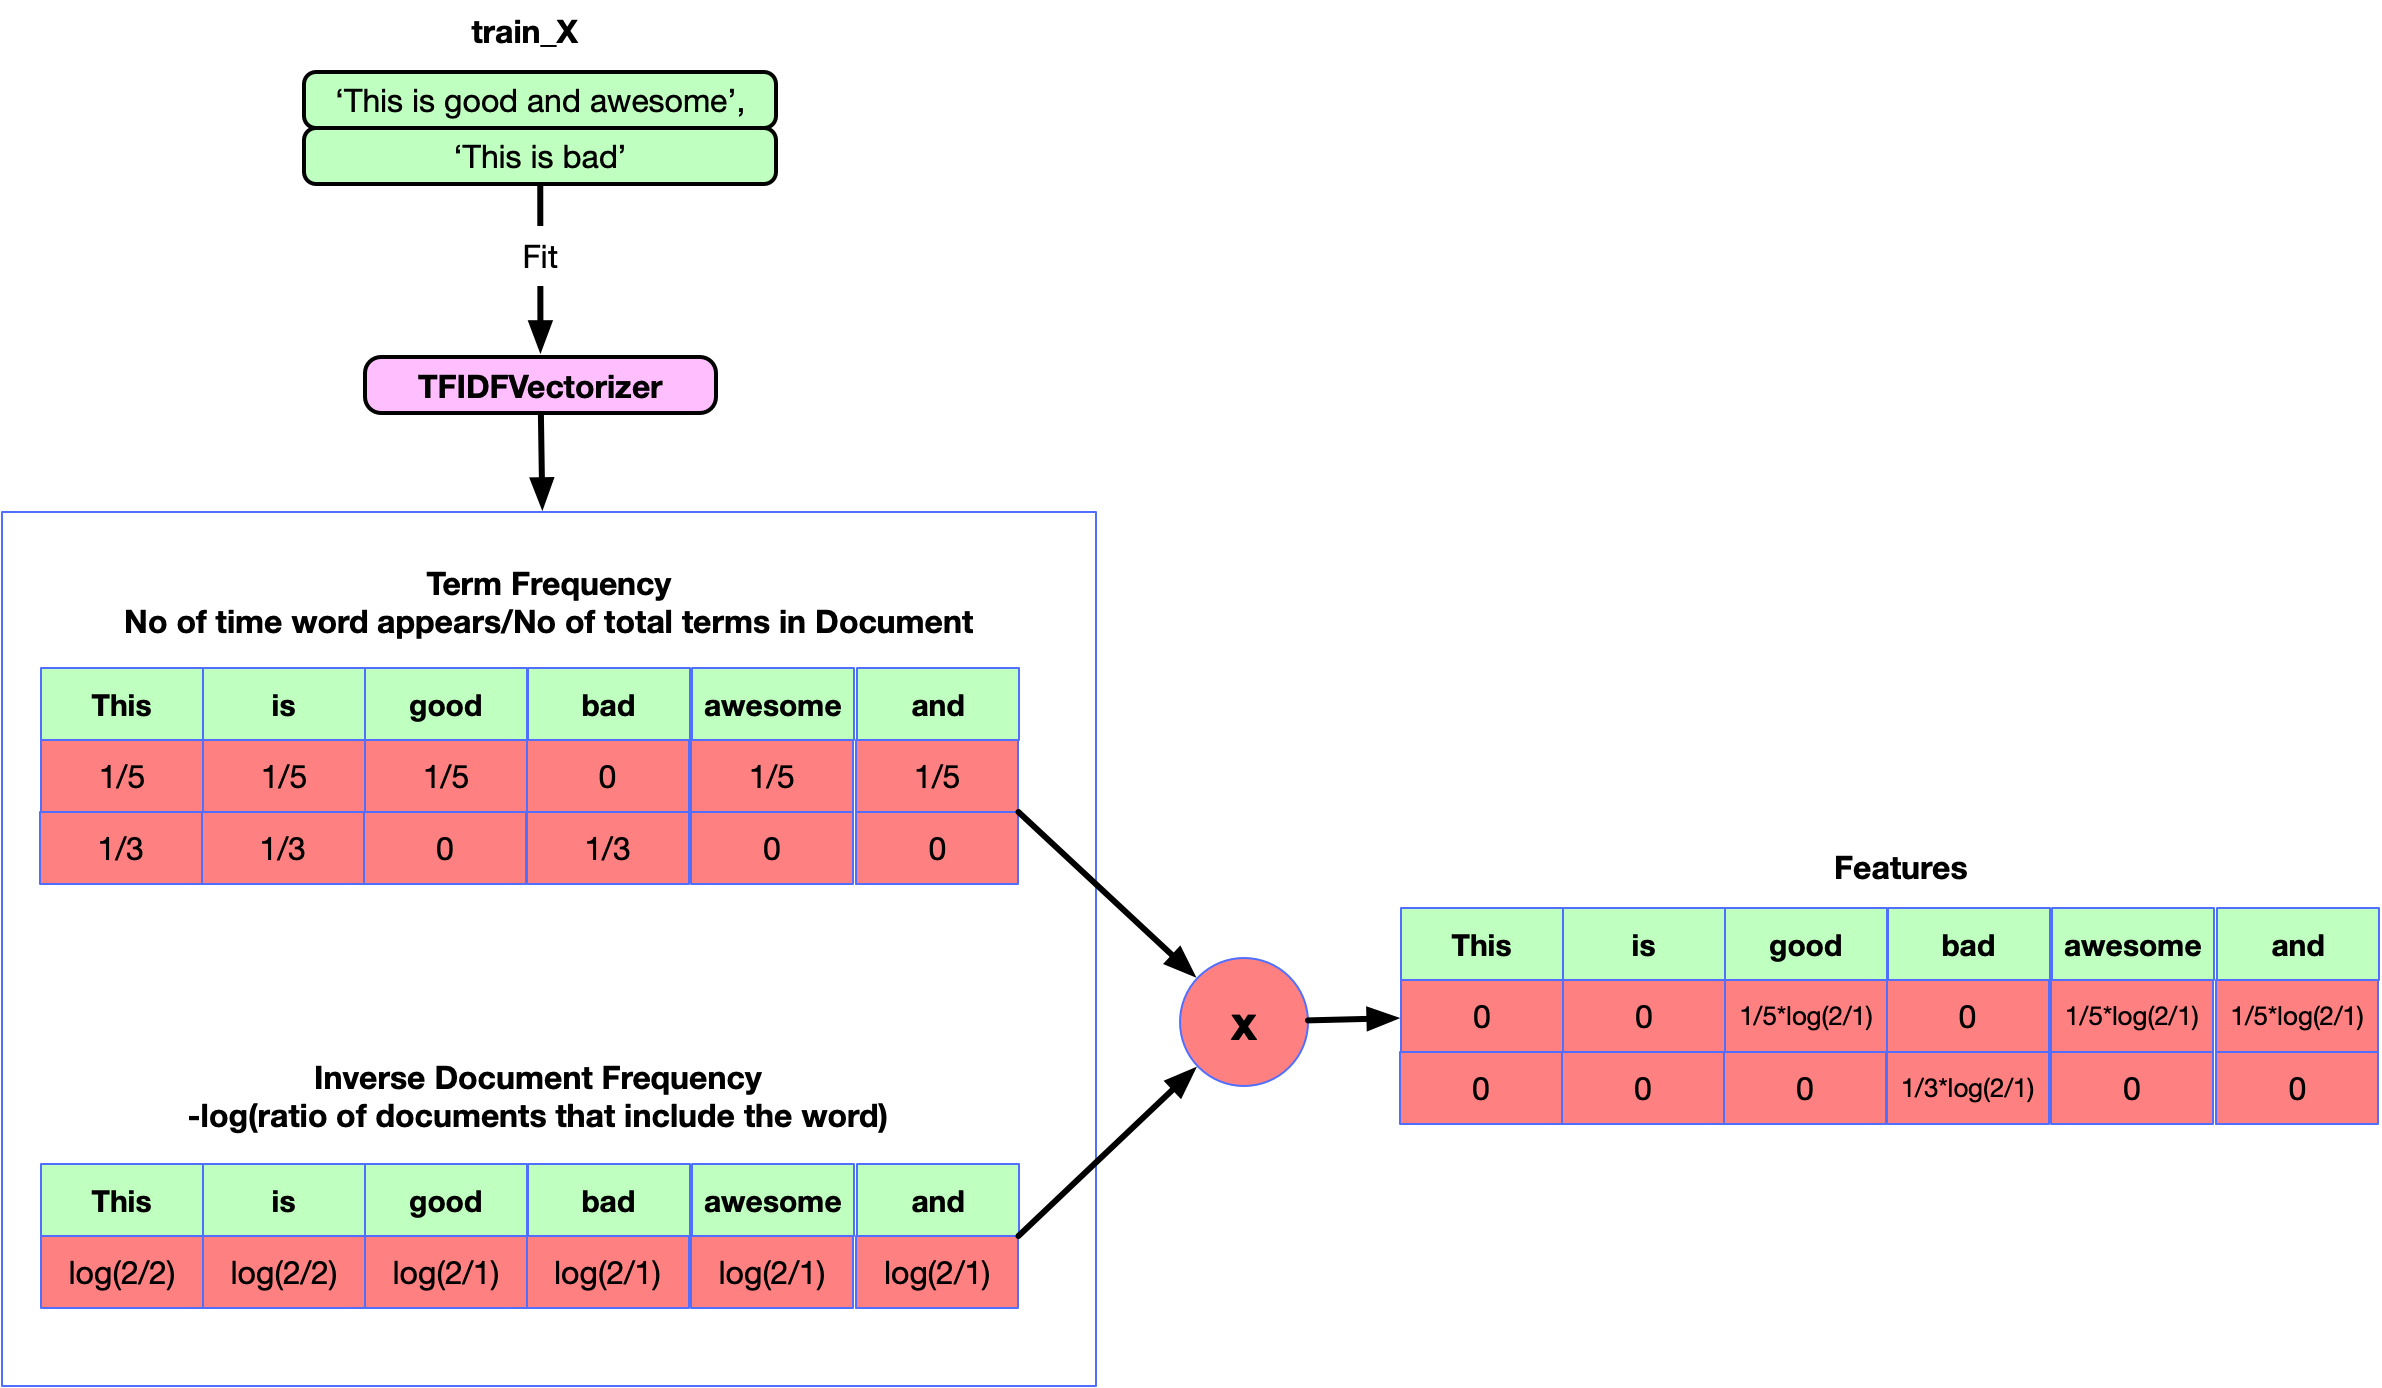

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_train_feat_tfidf = tfidf_vect.fit_transform(X_train).toarray()
X_test_feat_tfidf = tfidf_vect.transform(X_test).toarray()
print(X_train_feat_tfidf) 
print(X_test_feat_tfidf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [132]:
X_train_feat_tfidf.shape, X_test_feat_tfidf.shape

((16000, 27270), (4000, 27270))

### Logistic Regression

In [133]:
logmodel_cv = LogisticRegression()
logmodel_cv.fit(X_train_feat_tfidf, y_train)
predictions_lr = logmodel_cv.predict(X_test_feat_tfidf)
predictions_lr

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array(['clothing', 'clothing', 'clothing', ..., 'beautytoys&more',
       'gadgets&accessories', 'homeessentials'], dtype=object)

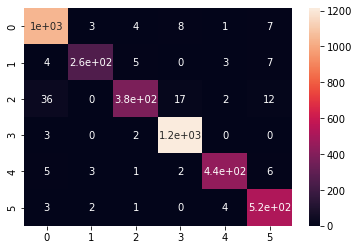

In [137]:
cm = confusion_matrix(y_test, predictions_lr)
sns.heatmap(cm, annot=True)

In [138]:
accuracy_score(y_test, predictions_lr)

0.96475

In [139]:
print(classification_report(y_test,predictions_lr))

                        precision    recall  f1-score   support

accessories&essentials       0.95      0.98      0.97      1069
automotive&accessories       0.97      0.93      0.95       274
       beautytoys&more       0.97      0.85      0.90       447
              clothing       0.98      1.00      0.99      1217
   gadgets&accessories       0.98      0.96      0.97       462
        homeessentials       0.94      0.98      0.96       531

              accuracy                           0.96      4000
             macro avg       0.96      0.95      0.96      4000
          weighted avg       0.96      0.96      0.96      4000



### Random Forest Classifier

In [87]:
classifier_rfc = RandomForestClassifier(n_estimators = 500, random_state=0)
classifier_rfc

RandomForestClassifier(n_estimators=500, random_state=0)

In [88]:
classifier_rfc.fit(X_train_feat_tfidf, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [90]:
predictions_rfc = classifier_rfc.predict(X_test_feat_tfidf)
predictions_rfc

array(['clothing', 'gadgets&accessories', 'gadgets&accessories', ...,
       'accessories&essentials', 'homeessentials', 'clothing'],
      dtype=object)

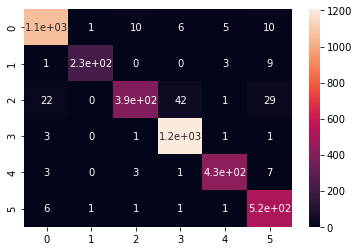

In [91]:
cm = confusion_matrix(y_test, predictions_rfc)
sns.heatmap(cm, annot=True)

In [92]:
accuracy_score(y_test, predictions_rfc)

0.95775

In [45]:
print(classification_report(y_test,predictions_rfc))

                        precision    recall  f1-score   support

accessories&essentials       0.97      0.99      0.98      1082
automotive&accessories       0.99      0.94      0.96       242
       beautytoys&more       0.96      0.81      0.88       470
              clothing       0.96      0.99      0.98      1202
   gadgets&accessories       0.98      0.95      0.97       463
        homeessentials       0.93      0.99      0.96       541

              accuracy                           0.96      4000
             macro avg       0.96      0.95      0.95      4000
          weighted avg       0.96      0.96      0.96      4000



### K Neighbors Classifier

In [45]:
neigh_cv = KNeighborsClassifier(n_neighbors=7)
neigh_cv

KNeighborsClassifier(n_neighbors=7)

In [46]:
neigh_cv.fit(X_train_feat_tfidf, y_train)

KNeighborsClassifier(n_neighbors=7)

In [49]:
predictions_KNN_cv = neigh_cv.predict(X_test_feat_tfidf)
predictions_KNN_cv

array(['homeessentials', 'clothing', 'clothing', ..., 'clothing',
       'automotive&accessories', 'beautytoys&more'], dtype=object)

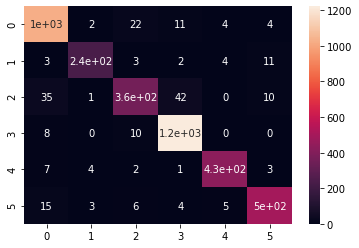

In [51]:
cm = confusion_matrix(y_test, predictions_KNN_cv)
sns.heatmap(cm, annot=True)

In [52]:
print(classification_report(y_test,predictions_KNN_cv))

                        precision    recall  f1-score   support

accessories&essentials       0.94      0.96      0.95      1071
automotive&accessories       0.96      0.91      0.93       260
       beautytoys&more       0.89      0.80      0.85       448
              clothing       0.95      0.99      0.97      1240
   gadgets&accessories       0.97      0.96      0.97       447
        homeessentials       0.95      0.94      0.94       534

              accuracy                           0.94      4000
             macro avg       0.94      0.93      0.93      4000
          weighted avg       0.94      0.94      0.94      4000



In [53]:
accuracy_score(y_test, predictions_KNN_cv)

0.9445

#### In Tf-Idf also we get max accuracy with Logistic Regression

In [140]:
flipkart['predict_lr_tf'] = 'Training row'
j=0
for i in X_test.index:
    flipkart['predict_lr_tf'][i] = predictions_lr[j]
    j=j+1

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [141]:
flipkart

description  \
0      key features of alisha solid women's cycling s...   
1      fabhomedecor fabric double sofa bed (finish co...   
2      key features of aw bellies sandals wedges heel...   
3      key features of alisha solid women's cycling s...   
4      specifications of sicons all purpose arnica do...   
...                                                  ...   
19995  buy walldesign small vinyl sticker for rs.730 ...   
19996  buy wallmantra large vinyl stickers sticker fo...   
19997  buy elite collection medium acrylic sticker fo...   
19998  buy elite collection medium acrylic sticker fo...   
19999  buy elite collection medium acrylic sticker fo...   

             product_category  \
0                    clothing   
1              homeessentials   
2             beautytoys&more   
3                    clothing   
4             beautytoys&more   
...                       ...   
19995  automotive&accessories   
19996  automotive&accessories   
19997  automotive&accessories   
19998  automotive&accessories   
19999  automotive&accessories   

                                              desc_clean  length  \
0       alisha solid woman cycling short cotton lycra...     351   
1      fabhomedecor fabric double sofa bed finish col...    3335   
2       aw belly sandal wedge heel casualsaw belly pr...     526   
3       alisha solid woman cycling short cotton lycra...     346   
4      specification sicons purpose arnica dog shampo...     224   
...                                                  ...     ...   
19995  buy walldesign small vinyl sticker rs730  wall...     162   
19996  buy wallmantra large vinyl sticker sticker rs1...     179   
19997  buy elite collection medium acrylic sticker rs...     180   
19998  buy elite collection medium acrylic sticker rs...     181   
19999  buy elite collection medium acrylic sticker rs...     180   

             predict_lr_cv           predict_lr_tf  
0             Training row            Training row  
1             Training row            Training row  
2             Training row            Training row  
3             Training row            Training row  
4      gadgets&accessories         beautytoys&more  
...                    ...                     ...  
19995         Training row            Training row  
19996         Training row            Training row  
19997  gadgets&accessories  automotive&accessories  
19998         Training row            Training row  
19999         Training row            Training row  

[20000 rows x 6 columns]

In [142]:
# df = pd.ExcelWriter('flipkart_predict.xlsx')
# flipkart.to_excel(df)
# df.save()